Este dataset lo analizamos y trabajamos en el ejercicio anterior, así empezamos el ejercicio sabiendo que no tiene valores nulos, conociendo cada variable, sus distribuciones y las transformaciones que necesitan.

# Importación de bibliotecas:

In [68]:
# Leer el dataframe:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import os

# visualización:
import matplotlib.pyplot as plt

# visualizaciones estadísticas y estéticas:
import seaborn as sns 

# Para crear nuevas clases para transformaciones:
from sklearn.base import TransformerMixin 

# preprocesamiento:
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.preprocessing import PolynomialFeatures

# reducción de dimensionalidad:
from sklearn.decomposition import PCA 

# transformación de datos:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
from scipy.stats import pearsonr

# módulos de selección de modelo:
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as lr
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# tuberías de transmisión:
from sklearn.pipeline import Pipeline

# Para crear una clase de transformación box-cox:
from sklearn.base import BaseEstimator, TransformerMixin 

from collections import Counter
import warnings

In [69]:
# Importamos los datos con los que vamos a trabajar:
df_housing = pd.read_csv("housing data.csv", header=None)
# nombramos las columnas:
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Visualizar datos del dataframe:

In [70]:
# Primeras 5 líneas:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [71]:
# Últimas 5 líneas:
df_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [72]:
# Muestra aleatoria:
df_housing.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
153,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403.0,14.7,261.95,15.79,19.4
294,0.08199,0.0,13.92,0,0.437,6.009,42.3,5.5027,4,289.0,16.0,396.90,10.40,21.7
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73,24.4


In [73]:
# Tamaño del dataframe:
df_housing.shape

(506, 14)

# Análisis exploratorio de datos

In [74]:
# General:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* El dataframe no contiene datos nulos.

* Podemos ver que incluso cuando 'CHAS' es una variable categórica, nuestro conjunto de datos lo muestra como una variable numérica, por lo que tendremos que convertirlo a un formato categórico.

In [75]:
# Identificar registros duplicados:
df_housing.duplicated().sum()   

0

In [76]:
# Identificar columnas duplicadas:
duplicates = []
for col in range(df_housing.shape[1]):
    contents = df_housing.iloc[:, col]
    
    for comp in range(col + 1, df_housing.shape[1]):
        if contents.equals(df_housing.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
print(duplicates)

[]


No se encontraron registros ni columnas duplicadas.

In [77]:
# Resumen Estadístico:
df_housing.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.614,8.602,0.006,0.082,0.257,3.677,88.976
ZN,506.0,11.364,23.322,0.000,0.000,0.000,12.500,100.000
INDUS,506.0,11.137,6.860,0.460,5.190,9.690,18.100,27.740
CHAS,506.0,0.069,0.254,0.000,0.000,0.000,0.000,1.000
NOX,506.0,0.555,0.116,0.385,0.449,0.538,0.624,0.871
RM,506.0,6.285,0.703,3.561,5.885,6.208,6.624,8.780
AGE,506.0,68.575,28.149,2.900,45.025,77.500,94.075,100.000
DIS,506.0,3.795,2.106,1.130,2.100,3.207,5.188,12.126
RAD,506.0,9.549,8.707,1.000,4.000,5.000,24.000,24.000
TAX,506.0,408.237,168.537,187.000,279.000,330.000,666.000,711.000


De la distribución anterior podemos ver que:

1. La variable 'ZN' es 0 para los percentiles 25 y 50 que darán como resultado datos distorsionados. Este es el resultado de que 'ZN' sea una variable condicional.

2. También para la variable 'CHAS' es 0 para los percentiles 25, 50 y 75 que también nos mostrarán que los datos están muy sesgados. Este es el resultado de que 'CHAS' es un dato categórico, que contiene solo los valores 0 y 1.

Otro hecho importante que podemos derivar de la descripción anterior es que el valor máximo de 'MEDV', que es 50, va junto con la descripción de datos original que dice: La variable n.º 14 parece estar censurada en 50,00 (correspondiente a un precio medio de 50 000 dólares)

Para empezar, podemos derivar una suposición de que las variables 'ZN' y 'CHAS' pueden no ser útiles para predecir MEDV, ya que darán como resultado un modelo sesgado, así que eliminémoslas.

In [78]:
# Tomando la media de cada atributo:
data_desc = df_housing.describe()

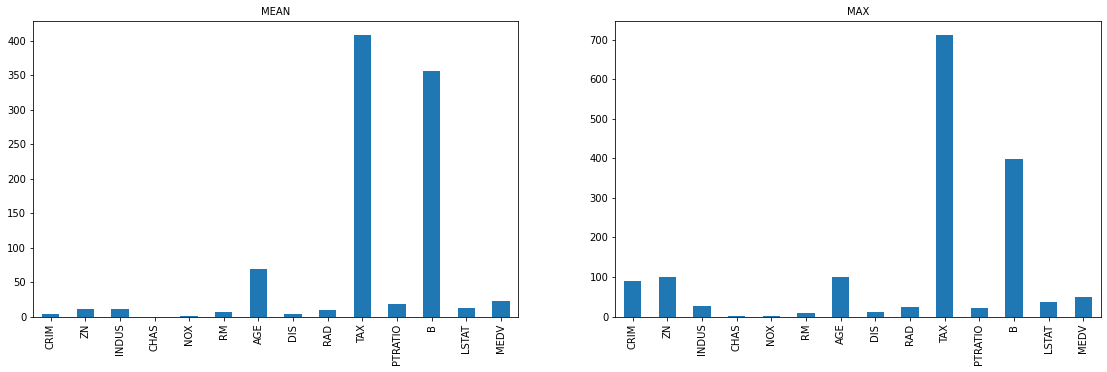

In [79]:
# Trazar la media y el valor máximo de todos los atributos:

plt.figure(figsize=(40,25))
plt.subplot(4,4,1)
data_desc.loc['mean'].plot.bar()
plt.title('MEAN', fontsize = 10);

plt.subplot(4,4,2)
data_desc.loc['max'].plot.bar()
plt.title('MAX', fontsize = 10);

A partir de la información anterior, podemos inferir que 'Tax' y 'B' muestran algunos valores medios anormales en comparación con otras variables, por lo que tendremos que controlarlos mientras construimos nuestro algoritmo de aprendizaje automático.

In [80]:
# Eliminando los Atributos pocos utiles 'ZN' y 'CHAS'
dataset = df_housing.drop(['ZN', 'CHAS'], axis=1)

# Comprobación y tratamiento de valores atípicos en los datos

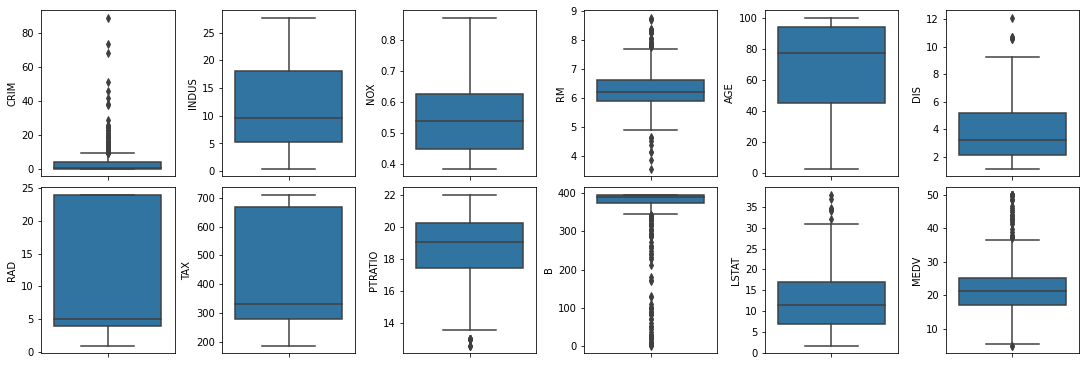

In [81]:
# Trazar diagramas de caja para ver si hay valores atípicos en nuestros datos (considerando los datos entre los percentiles 25 y 75 como no atípicos):
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
  sns.boxplot(y=i, data=dataset, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

Las columnas **CRIM**, **RM**, **DIS**, **PTRATIO**, **B**, **LSTAT** y **MEDV** tienen valores atípicos.

In [82]:
# comprobación del porcentaje/cantidad de valores atípicos:

for i in dataset.columns:
  dataset.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dataset[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)] #creando una serie de datos atípicos
  perc = (outlier_data.count()/dataset[i].count())*100
  print('Los valores atípicos en %s son %.2f%% con recuento %.f' %(i, perc, outlier_data.count()))
  #----------------------el siguiente código es para las próximas secciones----------------------
  if i == 'B':
    outlierDataB_index = outlier_data.index
    outlierDataB_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataB_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDataCRIM_index = outlier_data.index
    outlierDataCRIM_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataCRIM_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound

Los valores atípicos en CRIM son 13.04% con recuento 66
Los valores atípicos en INDUS son 0.00% con recuento 0
Los valores atípicos en NOX son 0.00% con recuento 0
Los valores atípicos en RM son 5.93% con recuento 30
Los valores atípicos en AGE son 0.00% con recuento 0
Los valores atípicos en DIS son 0.99% con recuento 5
Los valores atípicos en RAD son 0.00% con recuento 0
Los valores atípicos en TAX son 0.00% con recuento 0
Los valores atípicos en PTRATIO son 2.96% con recuento 15
Los valores atípicos en B son 15.22% con recuento 77
Los valores atípicos en LSTAT son 1.38% con recuento 7
Los valores atípicos en MEDV son 7.91% con recuento 40


Las variables 'CRIM' y 'B' tienen un alto porcentaje de datos atípicos que pueden afectar negativamente la precisión de nuestro modelo.

Para deshacernos de esto, podemos descartar las observaciones o reemplazarlas con algún enfoque como la media o la mediana. Pero descartar todas las observaciones de valores atípicos no es una buena idea, ya que nos quedarán muy pocas observaciones debido al mayor porcentaje de valores atípicos para entrenar nuestro modelo, también si reemplazamos un porcentaje tan grande de valores atípicos con algún enfoque (media, mediana ... etc.), entonces podría resultar en un modelo menos preciso o sesgado.

Podemos usar una alternativa: eliminemos los valores atípicos extremos y reemplacemos los restantes por algún enfoque (media, mediana, etc.)

# Limpieza de Datos:

In [83]:
# función se encarga de los valores perdidos:
# sustituir los valores que faltan en las columnas numéricas por el valor medio de la columna.
def fill_missing_values(dataset):
   for col in dataset.select_dtypes(include= ["int","float"]).columns:
      val = dataset[col].mean()
      dataset[col].fillna(val, inplace=True)
   return dataset

In [84]:
# Para eliminar los valores atípicos:
# Toma un marco de datos y una lista de columnas
# Para cada columna de la lista, calcula la media y la desviación estándar
# Calcula un límite inferior y superior utilizando la media y la desviación estándar
#Elimina los valores que están fuera del rango definido por el límite inferior y superior

def remove_outliers(dataset, column_list):
   for col in column_list:
      avg = dataset[col].mean()
      std = dataset[col].std()
      low = avg - 2 * std
      high = avg + 2 * std
      dataset = dataset[dataset[col].between(low, high, inclusive=True)]
   return dataset

In [85]:
my_df = dataset.copy()
df_processed = (my_df.
                pipe(fill_missing_values).
                pipe(remove_outliers, ['CRIM', 'B']))

<ipython-input-84-dc986bf5edb9>:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dataset = dataset[dataset[col].between(low, high, inclusive=True)]


In [86]:
# Datos originales:
df_housing.shape

(506, 14)

In [87]:
# Datos Procesados:
df_processed.shape

(456, 12)

Eliminamos 50 observaciones de nuestro conjunto de datos, ahora nos quedan 456 observaciones y 12 columnas.

In [88]:
# Normalizamos sus distribuciones con MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler

variablesNorm = ['CRIM','INDUS', 'TAX', 'NOX', 'DIS','LSTAT']
mms = MinMaxScaler(feature_range = (0, 1))
df_processed[variablesNorm] = mms.fit_transform(df_processed[variablesNorm])

In [89]:
# A continuación se muestra la descripción de nuestro conjunto de datos después de tratar los valores atípicos:
df_processed.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
CRIM,456.0,0.091,0.181,0.000,0.003,0.009,0.062,1.00
INDUS,456.0,0.364,0.249,0.000,0.164,0.282,0.647,1.00
NOX,456.0,0.320,0.227,0.000,0.128,0.278,0.453,1.00
RM,456.0,6.318,0.698,3.561,5.890,6.218,6.632,8.78
AGE,456.0,66.077,28.412,2.900,41.100,72.200,92.750,100.00
DIS,456.0,0.261,0.192,0.000,0.105,0.217,0.388,1.00
RAD,456.0,8.173,7.834,1.000,4.000,5.000,7.000,24.00
TAX,456.0,0.374,0.298,0.000,0.172,0.229,0.468,1.00
PTRATIO,456.0,18.311,2.178,12.600,16.900,18.600,20.200,22.00
B,456.0,381.699,27.658,227.610,379.628,392.475,396.540,396.90


# Visualización de los Atributos antes y después del preprocesado:

Comprobamos que el preprocesado se ha realizado correctamente:

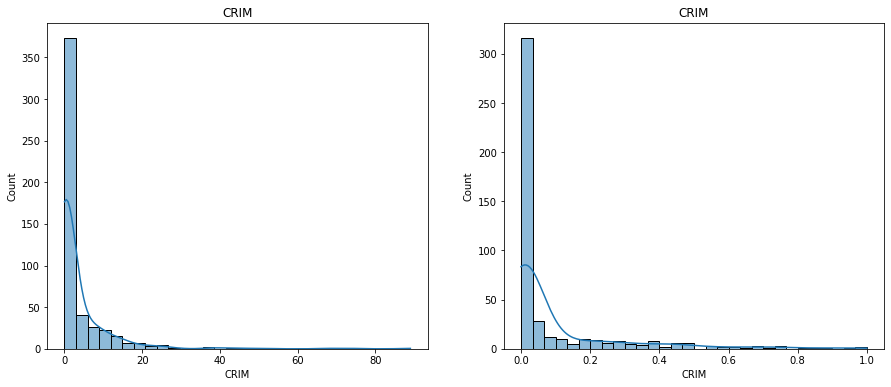

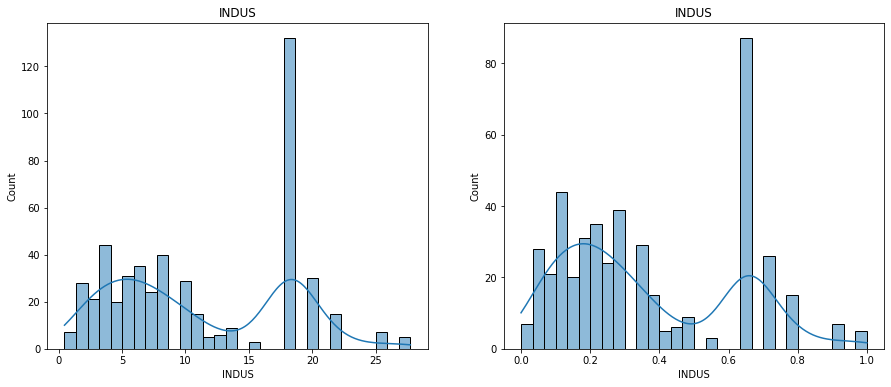

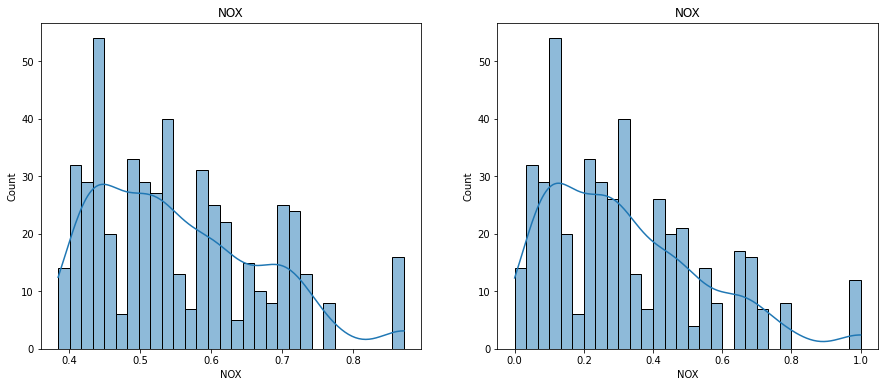

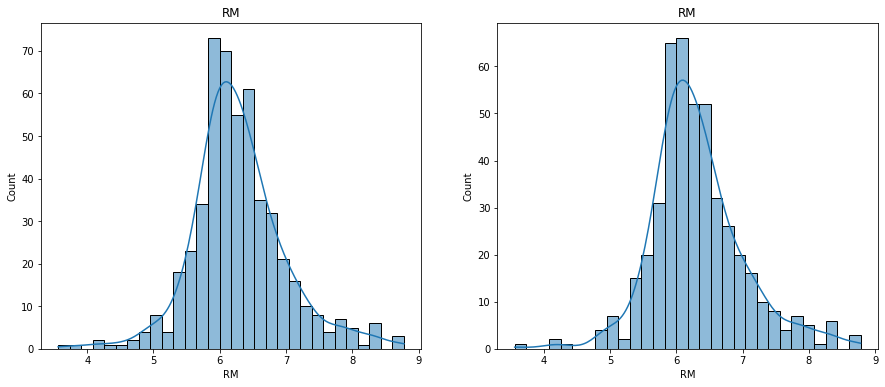

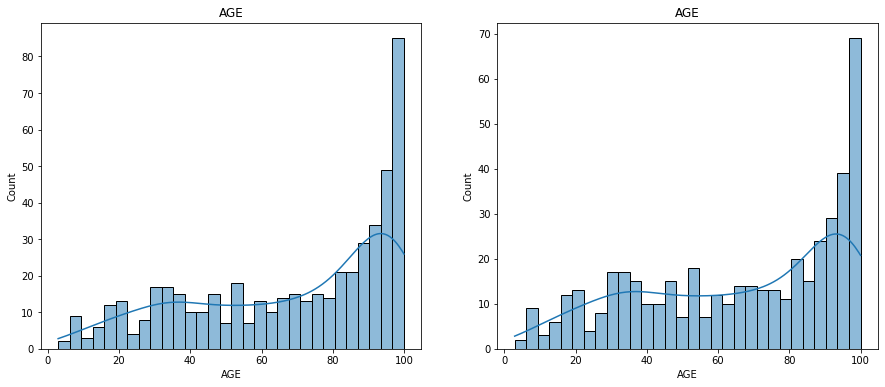

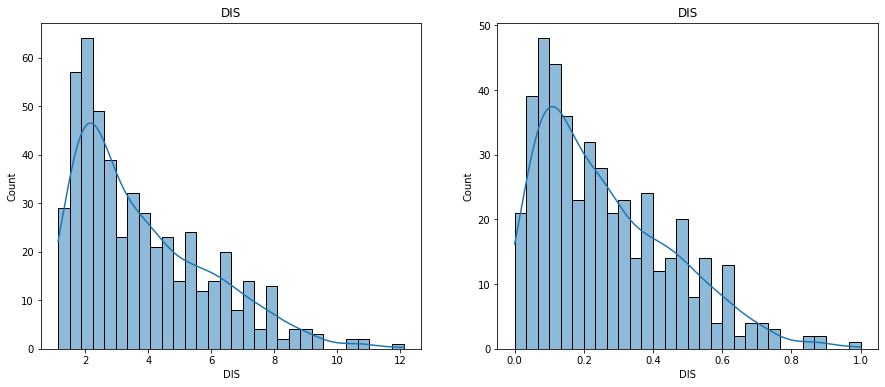

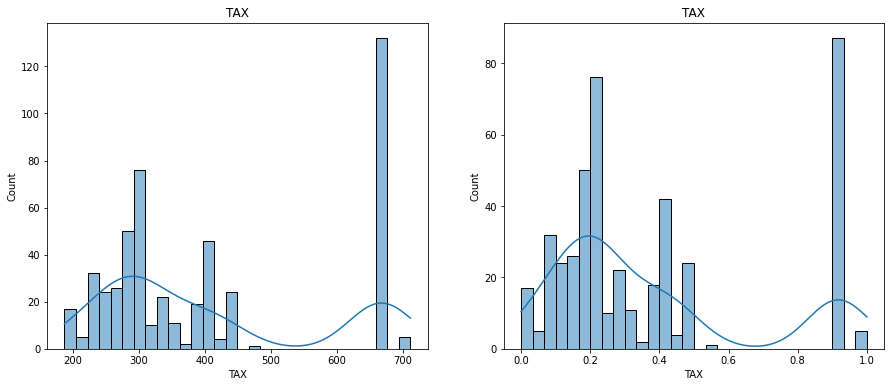

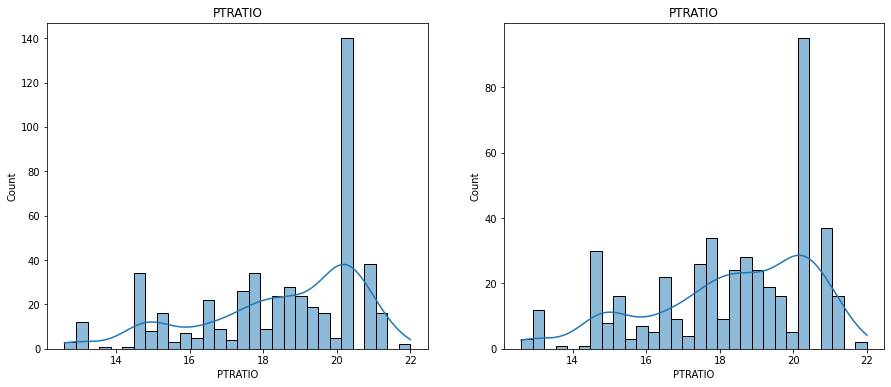

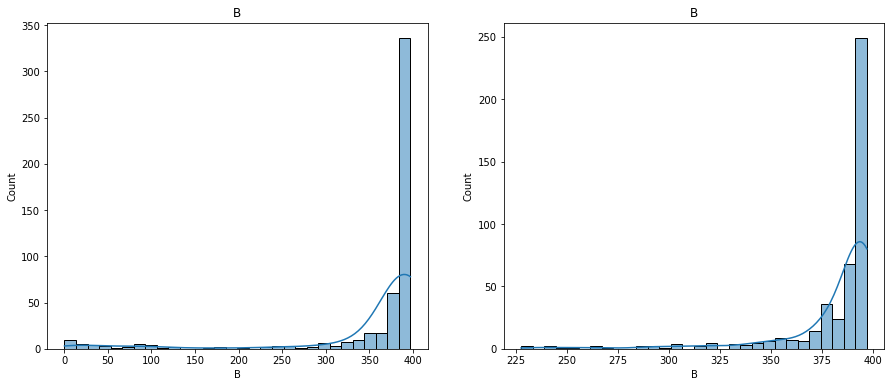

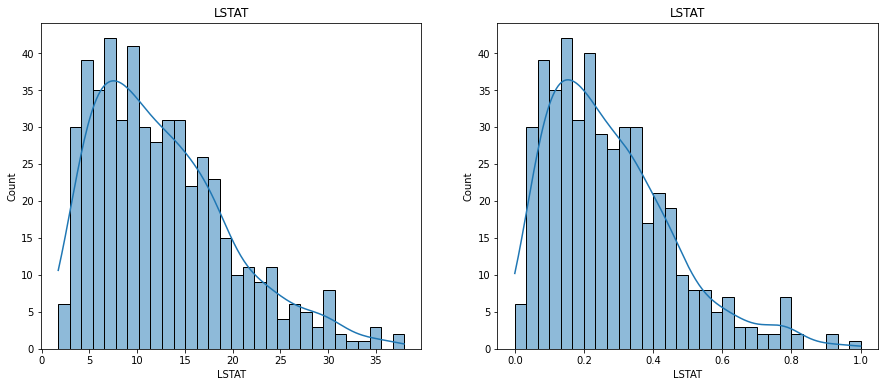

In [90]:
columns = ['CRIM',  'INDUS','NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for colum in columns:
    # distribución de la variable antes del preprocesado
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(colum)
    sns.histplot(dataset[colum] , bins = 30, kde=True)

    # distribución de la variable después del preprocesado
    plt.subplot(1,2,2)
    plt.title(colum)
    sns.histplot(df_processed[colum] , bins = 30, kde=True)

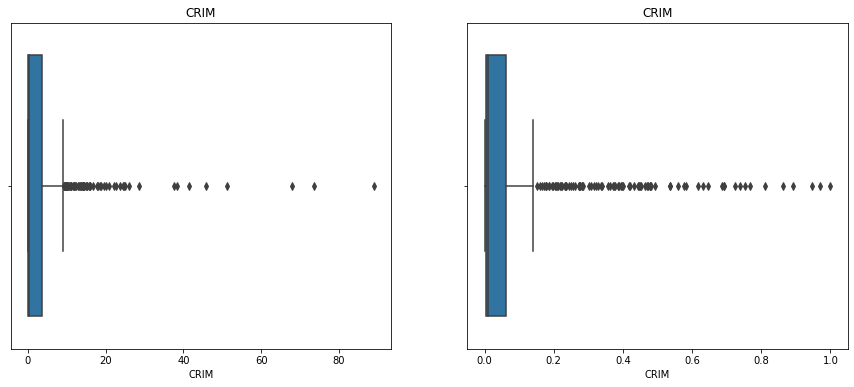

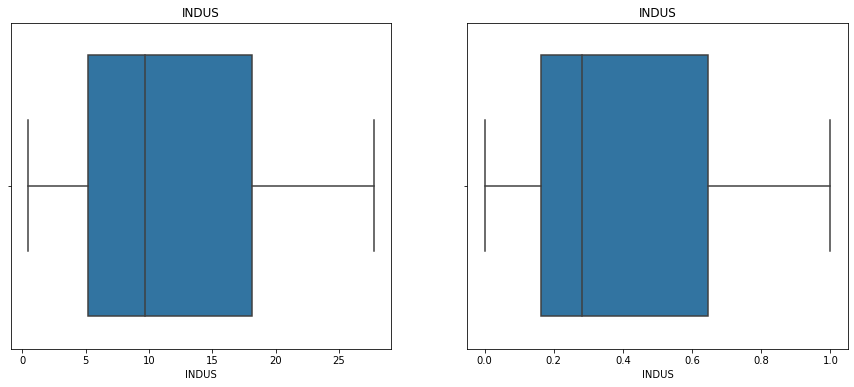

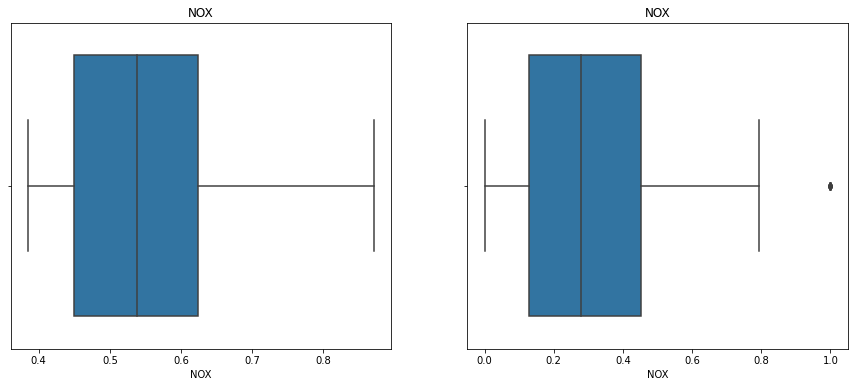

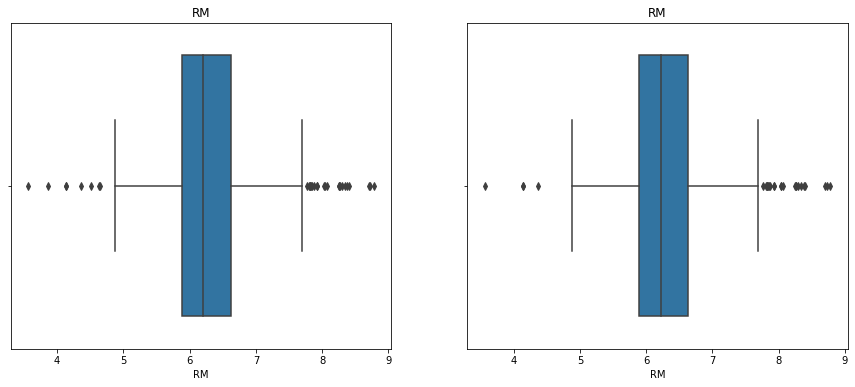

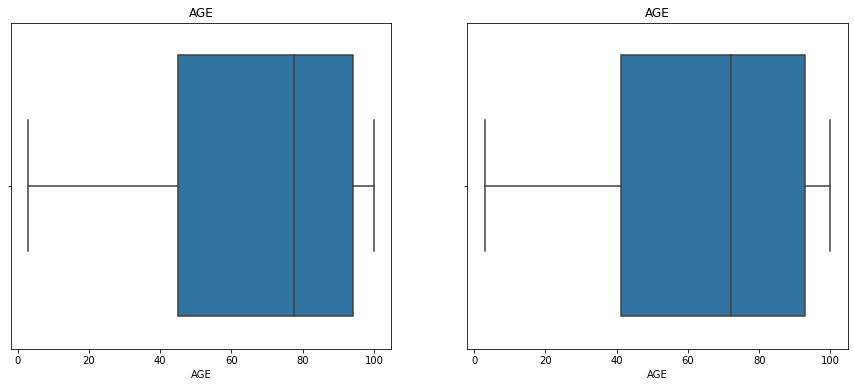

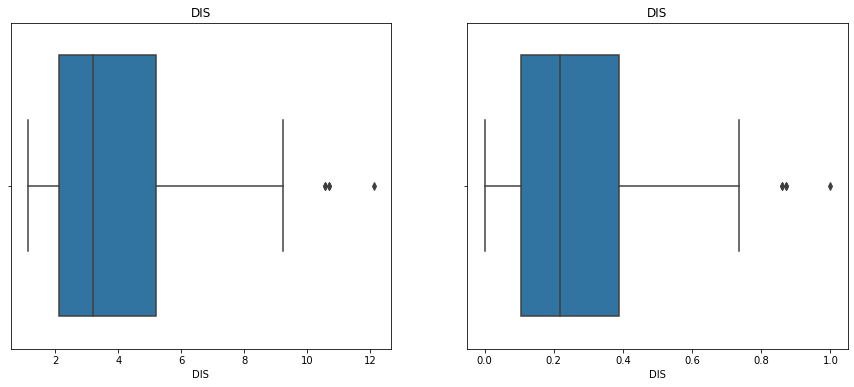

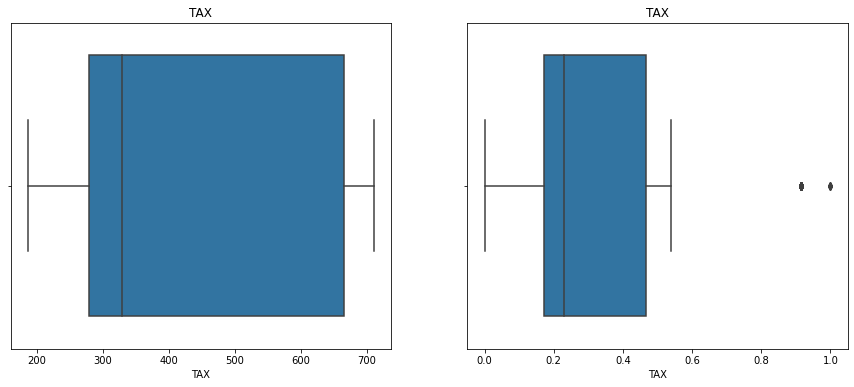

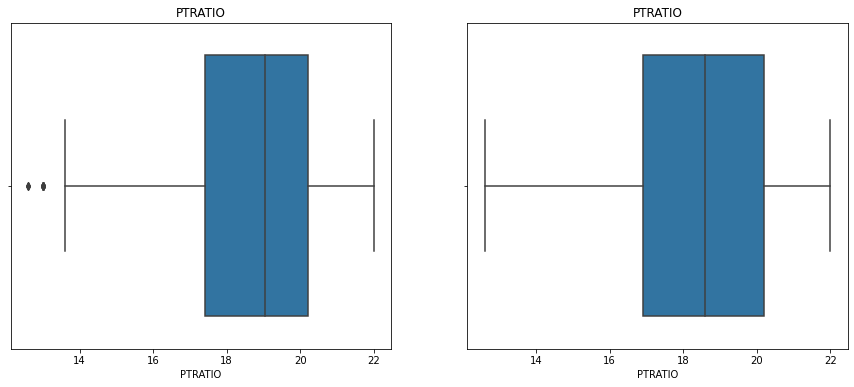

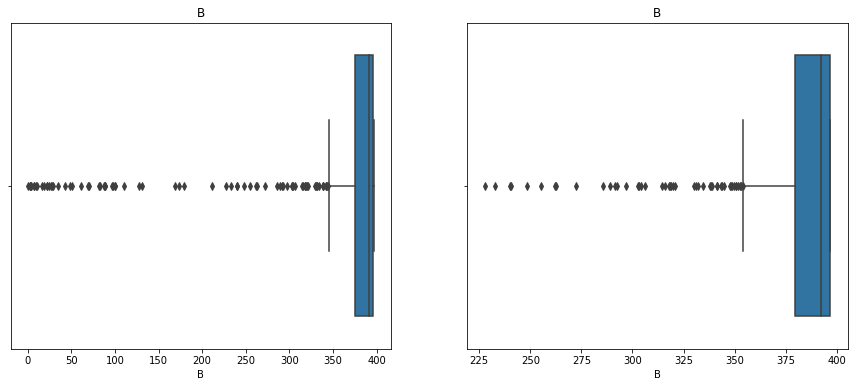

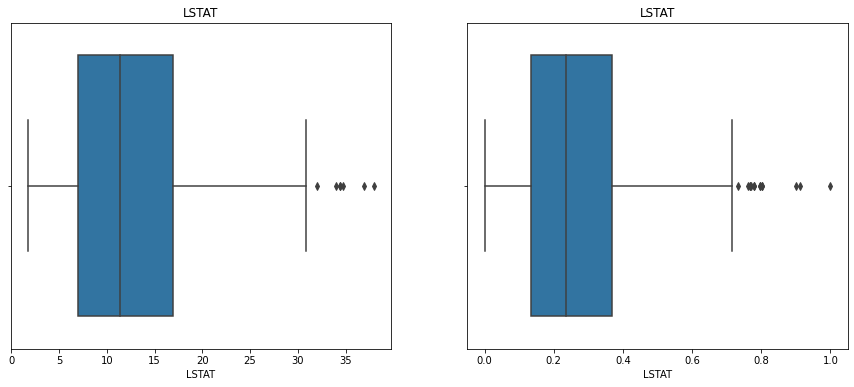

In [91]:
# Verificando valores Atipicos antes del preprocesado:
for colum in columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(colum)
    sns.boxplot(x = dataset[colum])

# Verificando valores Atipicos después del preprocesado:   
    plt.subplot(1,2,2)
    plt.title(colum)
    sns.boxplot(x = df_processed[colum])

# Selección de las características que pueden predecir mejor el MEDV

Usando p-Value para seleccionar las características óptimas:

Eliminando todas las variables cuyo valor p es menor que el nivel de significación de 0.05 utilizando el método de eliminación hacia atrás

In [92]:
# variable independiente (X) y variable dependiente (Y):
X = df_processed.iloc[:, :-1]
Y = df_processed.iloc[:, 11]

In [93]:
# Selección de características usando valor P/eliminación hacia atrás:

def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #elimina la variable para ese valor p
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((456,1))  #agregando columnas de unos a X como lo requiere la biblioteca statsmodels
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

In [94]:
# cambiar el nombre de las variables después de la eliminación hacia atrás:
X.columns

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

# Usando la correlación de Pearson para eliminar cualquier variable independiente altamente correlacionada para evitar la multicolinealidad:

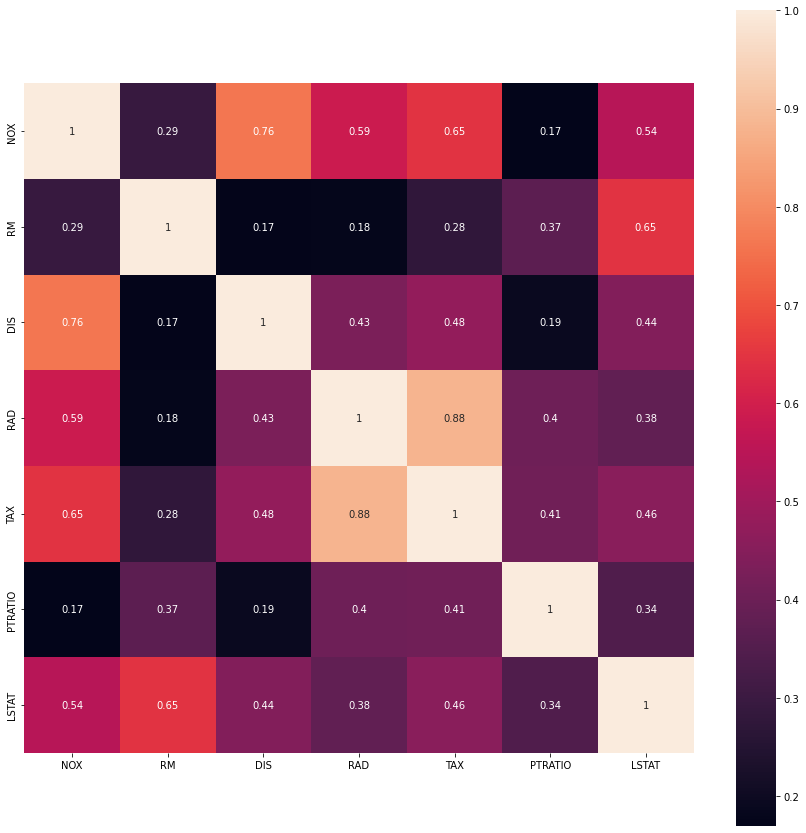

In [95]:
# Trazado de mapa de calor utilizando la correlación de Pearson entre variables independientes:

plt.figure(figsize=(15, 15))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

##Del mapa de calor de correlación anterior podemos ver que:

1. TAX y RAD están altamente correlacionados con una puntuación de 0,88. Según mi comprensión personal, el RAD (índice de accesibilidad a las carreteras radiales) será más importante para predecir el MEDV en comparación con el IMPUESTO (tasa de impuesto a la propiedad de valor total por $ 10,000), por lo que estoy considerando eliminar el IMPUESTO.

2. DIS y NOX están altamente correlacionados con una puntuación de 0,76. Según mi comprensión personal, DIS (distancias ponderadas a cinco centros de empleo de Boston) será más importante para predecir MEDV en comparación con NOX (concentración de óxidos nítricos (partes por 10 millones)), por lo que estoy considerando reducir NOX

In [96]:
# eliminando TAX y NOX:
X.drop('TAX', axis=1, inplace=True)
X.drop('NOX', axis=1, inplace=True)

In [97]:
# columnas restantes después de eliminar la multicolinealidad:
X.columns

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

# Comprobación de la correlación de las variables independientes restantes con MEDV utilizando el método de correlación de Pearson:

In [98]:
#ahora verificando la correlación de cada variable con MEDV por el método de Pearson y eliminando la que tiene menos correlación con MEDV:

for i in X.columns:
  corr, _ = pearsonr(X[i], Y)
  print(i,corr)

RM 0.7406736788148747
DIS 0.15688008051907057
RAD -0.2521001850527098
PTRATIO -0.4895849882965726
LSTAT -0.7082157741559417


Podemos ver que 'DIS' y 'RAD' están menos correlacionados con MEDV, por lo que descartar DIS y RAD

In [99]:
X.drop(['DIS', 'RAD'], axis=1, inplace=True)

In [100]:
# variables/características restantes que pueden predecir el MEDV más:
X.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

Del proceso de selección de características anterior, concluimos que las características 'RM', 'PTRATIO' y 'LSAT' pueden por sí solas predecir 'MEDV' mejor.

In [34]:
# Escalando las características:

from sklearn import preprocessing
X=preprocessing.scale(X)

# Ejercicio 1:

Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

# Aprendizaje automático

Esta es una regresión un problema ya que tenemos que predecir un valor continuo (no catagórico).

Implementar modelos de aprendizaje automático de regresión para extraer nuestro conjunto de datos (usando las variables independientes restantes) para predecir MEDV.

In [35]:
# División de datos en conjunto de entrenamiento y conjunto de prueba:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(342, 3) (114, 3) (342,) (114,)


Hacemos dos conjuntos, Train para entrenar nuestro modelo, y Test, para testear su eficacia. Tienen una proporción de 75% y 25% respectivamente.

# 1. Modelo de regresión lineal:

In [36]:
# Entrenando al modelo:
from sklearn.linear_model import LinearRegression

# Crear una regresión lineal:
lm = LinearRegression()

# Entrenando el modelo:
lm.fit(X_train,Y_train)

# Calculamos los coeficientes:
print("Coeficiente: ",lm.intercept_)

# Calculamos la constante cuando x=0:
print("Constante: ",lm.intercept_)

Coeficiente:  23.73950934001813
Constante:  23.73950934001813


# Evaluación del Modelo

Para datos de entrenamiento:

In [37]:
# Predicciones:
y_pred = lm.predict(X_train)

Y_compare_linear = pd.DataFrame({'Actual': Y_train, 'Predicho': y_pred})
Y_compare_linear.head() #mostrar la comparación entre los valores reales y predichos de MEDV

,Actual,Predicho
0,17.2,10.213742
1,27.9,28.543893
2,23.1,22.301087
3,23.2,21.276193
4,23.0,22.271614


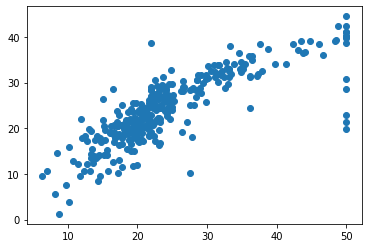

In [38]:
# diagrama de dispersión de y_pred vs y_train:
plt.scatter(Y_train,y_pred);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


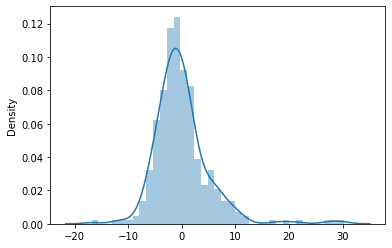

In [39]:
# Distribución de los residuos:
sns.distplot(Y_train - y_pred);

Aquí los residuos se distribuyen normalmente. Entonces se cumple el supuesto de normalidad

In [40]:
# Evaluando la regresión:

from sklearn import metrics

print('R-squared: ', metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE: ',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R-squared:  0.6714254299744633
Adjusted R^2: 0.6685090876369586
MAE:  3.4887110448011143
MSE:  26.889167429494922
RMSE:  5.185476586534253


• 𝑅^2 : Es una medida de la relación lineal entre X e Y. Se interpreta como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente.

• 𝑅^2 ajustado: el R-cuadrado ajustado compara el poder explicativo de los modelos de regresión que contienen diferentes números de predictores.

• MAE : Es la media del valor absoluto de los errores. Mide la diferencia entre dos variables continuas, aquí valores reales y predichos de y.

• MSE: El error cuadrático medio (MSE) es como el MAE, pero eleva al cuadrado la diferencia antes de sumarlas todas en lugar de usar el valor absoluto.

• RMSE: El error cuadrático medio (MSE) es como el MAE, pero eleva al cuadrado la diferencia antes de sumarlas todas en lugar de usar el valor absoluto.

# Validación del modelo test:

In [41]:
# Predicciones:
predictions = lm.predict(X_test)

Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicho': predictions})
Y_compare_linear.head() #mostrar la comparación entre los valores reales y predichos de MEDV

,Actual,Predicho
0,10.9,18.087675
1,30.8,29.333079
2,17.5,22.369976
3,30.1,28.381327
4,27.0,29.897601


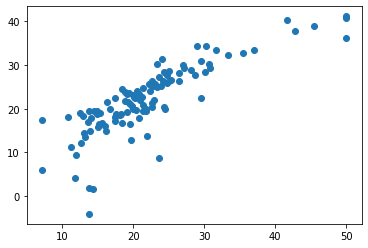

In [42]:
# diagrama de dispersión de y_test vs predicciones:
plt.scatter(Y_test, predictions);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


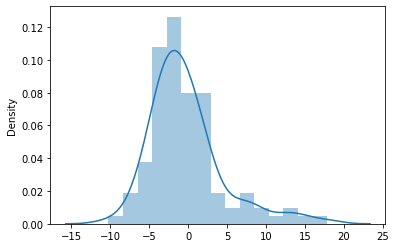

In [43]:
# Distribución de residuos.
sns.distplot(Y_test - predictions);

In [44]:
# Evaluación del modelo:
from sklearn import metrics

r2_linreg = metrics.r2_score(Y_test, predictions)
print('R-squared: ', r2_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, predictions))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(Y_test, predictions))
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-squared:  0.6635119289115248
Adjusted R^2: 0.6543349815182027
MAE:  3.4451169751662114
MSE:  22.206937009532304
RMSE:  4.712423687396147


In [45]:
MSE_lineal = 22.206937009532304
R2_lineal =  0.6635119289115248

Aquí, las puntuaciones de las evaluaciones de validación casi coinciden con las de los datos del **train.** Así que nuestro modelo no está sobreajustado.

# 2. Modelo de regresión Random Forest:

In [46]:
# Creando una instancia del regresor:
rf = RandomForestRegressor(n_estimators=100)

# Entrenando el modelo:
rf.fit(X_train,Y_train)

# Predicción sobre los datos del train:
y_pred = rf.predict(X_train)

Y_compare_randomforrest = pd.DataFrame({'Actual': Y_train, 'Predicted': y_pred})
Y_compare_randomforrest.head() #mostrando la comparación entre los valores reales y predichos de MEDV

,Actual,Predicted
0,17.2,14.837
1,27.9,26.817
2,23.1,21.586
3,23.2,21.076
4,23.0,23.061


# Evaluación del modelo

Para datos de entrenamiento:

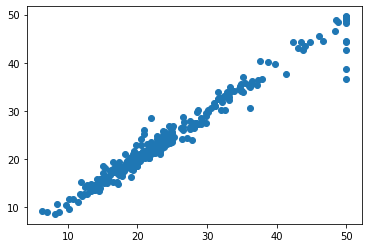

In [47]:
# Diagrama de dispersión de y_train vs y_pred
plt.scatter(Y_train, y_pred)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


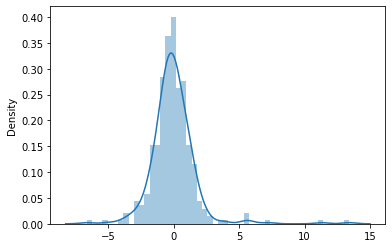

In [48]:
# Distribución de los residuos.
sns.distplot(Y_train - y_pred);

In [49]:
# Evaluación del modelo:
print('R^2:',metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.9643776656211251
Adjusted R^2: 0.9640614910556322
MAE: 1.0650614035087704
MSE: 2.915182733918129
RMSE: 1.7073906213629408


# Para datos de validación Test:

In [50]:
pred = rf.predict(X_test)

In [51]:
# Evaluación del modelo:

r2_rf = metrics.r2_score(Y_test, pred)
print('R^2:', r2_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, pred))
print('MSE:',metrics.mean_squared_error(Y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R^2: 0.8155468681088258
Adjusted R^2: 0.8105163281481574
MAE: 2.681166666666666
MSE: 12.173207412280696
RMSE: 3.489012383509221


In [52]:
MSE_forest = 12.112010701754382
R2_forest = 0.8164741442601077

# 3. K-Nearest Neighbour regression model:

In [53]:
# Crear un regresor KNN.
knn = KNeighborsRegressor(n_neighbors=13)

# Entrena al modelo usando los conjuntos de train:
knn.fit(X_train,Y_train)

# Predicción de modelos en datos de train:
y_pred = knn.predict(X_train)

Y_compare_knn = pd.DataFrame({'Actual': Y_train, 'Predicted': y_pred})
Y_compare_knn.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,17.2,12.961538
1,27.9,25.161538
2,23.1,21.684615
3,23.2,18.946154
4,23.0,22.923077


# Evaluación del modelo
Para datos de entrenamiento:



In [54]:
# Evalucación del modelo:

print('R^2:',metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.7756426724457914
Adjusted R^2: 0.7736513352189789
MAE: 2.6696131354026096
MSE: 18.36046454894633
RMSE: 4.284911265002617


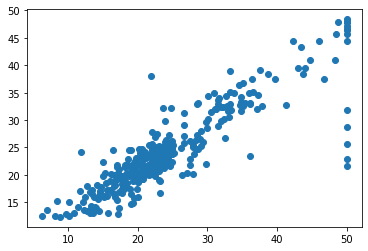

In [55]:
# diagrama de dispersión de y_train vs y_pred:

plt.scatter(Y_train, y_pred)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


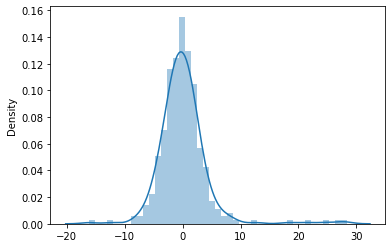

In [56]:
# Distribución de los residuos:

sns.distplot(Y_train - y_pred);

# Para datos de validación Test

In [57]:
# Predicción de datos de prueba con el modelo:
y_val_pred = knn.predict(X_test)

In [58]:
r2_svm = metrics.r2_score(Y_test, y_val_pred)
print('R^2:', r2_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_val_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_val_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_val_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_val_pred)))

R^2: 0.8438617690197954
Adjusted R^2: 0.8396034536294261
MAE: 2.4179487179487182
MSE: 10.304531298660853
RMSE: 3.21006717977379


In [59]:
MSE_knn = 12.733057894736834
R2_knn = 0.8070637977574867

# Comparación de gráficos de valores reales y predichos de MEDV que obtuvimos usando diferentes modelos de aprendizaje automático:

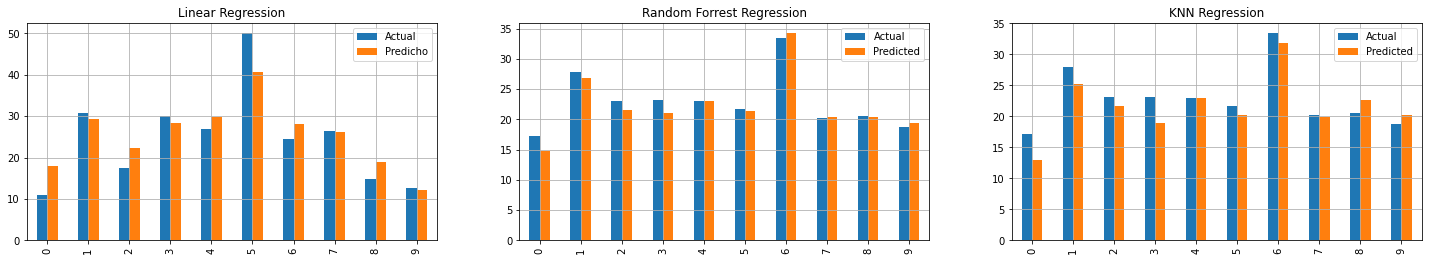

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[1])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[2])
plt.show()

#  Ejercicio 2:

Compárales en base al MSE y al R2.

# Evaluación y comparación de todos los modelos

In [61]:
modelos = pd.DataFrame({
    'Nombre Modelos': ['Linear Regression', 'Random Forest', 'KNN'], 'MSE': [MSE_lineal, MSE_forest, MSE_knn], 'R2': [R2_lineal, R2_forest, R2_knn],
    'R-squared Score': [r2_linreg*100, r2_rf*100, r2_svm*100]})
modelos

,Nombre Modelos,MSE,R2,R-squared Score
0,Linear Regression,22.206937,0.663512,66.351193
1,Random Forest,12.112011,0.816474,81.554687
2,KNN,12.733058,0.807064,84.386177


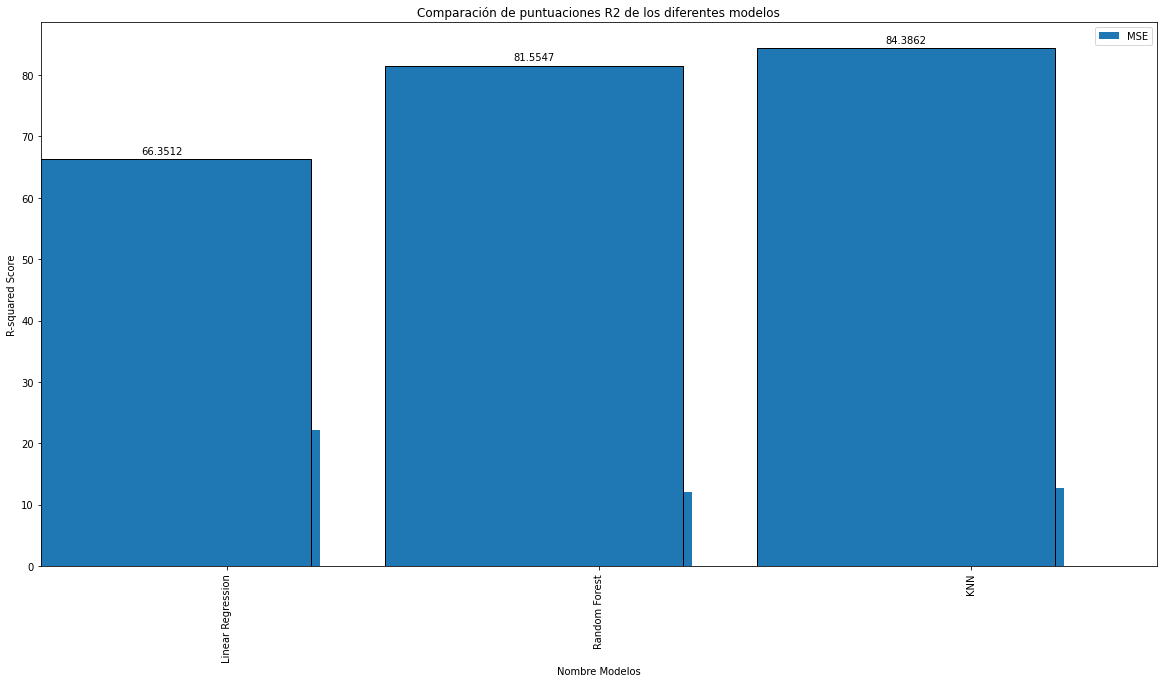

In [62]:
resultados= modelos['R-squared Score']
width = 0.35
x = np.arange(len(modelos))

modelos.sort_values(by='R-squared Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(20,10),
title='Comparación de puntuaciones R2 de los diferentes modelos'),
plt.ylabel('R-squared Score')

# Poner los resultados en cada barra:
ax = plt.subplot()
cifras_distritos = ax.bar(x -width/2, resultados, ec= 'black')
ax.bar_label(cifras_distritos, padding=3)

plt.show()

De la visualización anterior podemos resumir que el modelo de aprendizaje automático **KNN** (r2 = 0,84) da la mejor puntuación y podemos usarlo para predecir mejor los valores de MEDV.

Sin embargo, otros modelos como el modelo de regresión **LINEAR** (r2 = 0,66) tiene una puntuación  más baja.

##De las técnicas de ingeniería de datos y aprendizaje automático anteriores podemos concluir que:

1. Las características RM, PTRATIO y LSAT son las únicas capaces de predecir MEDV con una buena precisión.

2. El modelo de regresión aleatoria de Forrest (con 100 estimadores) se puede considerar como un buen modelo para predecir MEDV utilizando las tres características mencionadas anteriormente.

3. Sin embargo, los modelos KNN y y el modelo de regresión Linear también se pueden utilizar como alternativa a Random Forrest.


# Ejercicio 4:

Compara su rendimiento empleando la aproximación traicionando/test o empleando todos los datos (validación interna).

# Modelo Regresión Linear con todos los datos.

In [63]:
# Hacemos una predicción con nuestro modelo "lm" con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test:

from sklearn.model_selection import RepeatedKFold

model = lm
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,  # aquí podríamos pasar también un pipeline
                X         = X_train,
                y         = Y_train,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLS_completo = cv_scores.mean()

Métricas de validación cruzada: [0.72859977 0.66451583 0.56712686 0.68110735 0.64114772 0.71980077
 0.72905423 0.66422747 0.59966019 0.52550088 0.54182187 0.72282019
 0.41014831 0.73755839 0.71461308 0.56402664 0.62309894 0.66053577
 0.79132858 0.63991246 0.74513034 0.69129709 0.67014818 0.69387003
 0.51999285]
Média métricas de validación cruzada: 0.6498817513445949


# Modelo Random Forest con todos los datos:

Hacemos una predicción con nuestro modelo "regr" con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test.

In [64]:
# Validación cruzada repetida
model = rf
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,
                X         = X,
                y         = Y,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLM_copleto = cv_scores.mean()

Métricas de validación cruzada: [0.82546669 0.78263106 0.86298966 0.63702803 0.78257093 0.77474161
 0.73689744 0.77671473 0.83207387 0.68654281 0.65303573 0.74194245
 0.83966366 0.79661064 0.7891292  0.80290223 0.82674763 0.78858066
 0.64711071 0.75233758 0.83297575 0.7370692  0.8565114  0.74838026
 0.7036701 ]
Média métricas de validación cruzada: 0.7685729606126271


# Modelo KNN con todos los datos.

Hacemos una predicción con nuestro modelo "ridge_hiper", entrenado con los hiperparámetros, con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test.

In [65]:
model = knn
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,
                X         = X,
                y         = Y,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
R2_RRd_hiper_completo = cv_scores.mean()

Métricas de validación cruzada: [0.81190915 0.74715826 0.85448765 0.61137398 0.77735803 0.7609018
 0.72814725 0.78817971 0.86362721 0.71871746 0.62898289 0.74545376
 0.79693724 0.86112291 0.78730355 0.80295267 0.81341729 0.77062184
 0.74089817 0.71816    0.79548147 0.71292677 0.79701209 0.87783543
 0.69291367]
Média métricas de validación cruzada: 0.7681552099136225


# Comparamos las predicciones de los modelos sobre el conjunto completo de los datos:

In [66]:
modelos = pd.DataFrame({
    'Nombre Modelos': ['Linear Regression', 'Random Forest', 'KNN'], 'MSE': [MSE_lineal, MSE_forest, MSE_knn], 'R2': [R2_lineal, R2_forest, R2_knn],
    'R-squared Score': [r2_linreg*100, r2_rf*100, r2_svm*100], 'R2_Hiper': [cv_sc_mean_RLS_completo, cv_sc_mean_RLM_copleto, R2_RRd_hiper_completo]})
modelos

,Nombre Modelos,MSE,R2,R-squared Score,R2_Hiper
0,Linear Regression,22.206937,0.663512,66.351193,0.649882
1,Random Forest,12.112011,0.816474,81.554687,0.768573
2,KNN,12.733058,0.807064,84.386177,0.768155


Usando el conjunto completo de los datos la predicción NO  mejora respecto a la predicción del modelo con el conjunto train.

# Ejercicio 5:

No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [101]:
X.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

In [102]:
# definimos nuestro dataset de nuevo
X_sin_RM = X.drop('RM', axis=1).copy()
X_sin_RM.shape

(456, 2)

In [103]:
X_sin_RM.head()

,PTRATIO,LSTAT
0,15.3,0.089680
1,17.8,0.204470
2,17.8,0.063466
3,18.7,0.033389
4,18.7,0.099338


# Dividimos el dataset en los conjuntos Train y Test.

In [104]:
X_train_sin_RM, X_test_sin_RM, Y_train_sin_RM, Y_test_sin_RM = train_test_split(X_sin_RM, Y, test_size=0.33, random_state = 0)
print(X_train_sin_RM.shape, X_test_sin_RM.shape, Y_train_sin_RM.shape, Y_test_sin_RM.shape)

(305, 2) (151, 2) (305,) (151,)


Hacemos dos conjuntos, Train para entrenar nuestro modelo, y Test, para testear su eficacia. Tienen una proporción de 67% y 33% respectivamente.

# 1. Modelo de regresión lineal:

In [105]:
# Entrenando al modelo:
from sklearn.linear_model import LinearRegression

# Crear una regresión lineal:
lm = LinearRegression()

# Entrenando el modelo:
lm.fit(X_train_sin_RM,Y_train_sin_RM)

# Calculamos los coeficientes:
print("Coeficiente: ",lm.intercept_)

# Calculamos la constante cuando x=0:
print("Constante: ",lm.intercept_)

Coeficiente:  52.94878759039586
Constante:  52.94878759039586


# Evaluación del Modelo

Para datos de entrenamiento:

In [106]:
# Predicciones:
y_pred = lm.predict(X_train_sin_RM)

Y_compare_linear = pd.DataFrame({'Actual': Y_train_sin_RM, 'Predicho': y_pred})
Y_compare_linear.head() #mostrar la comparación entre los valores reales y predichos de MEDV

,Actual,Predicho
89,28.7,29.149515
313,21.6,26.672816
93,25.0,28.273685
307,28.2,26.972672
287,23.2,29.370052


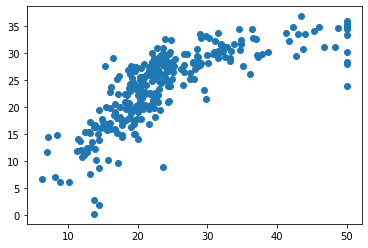

In [107]:
# diagrama de dispersión de y_pred vs y_train:
plt.scatter(Y_train_sin_RM, y_pred);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


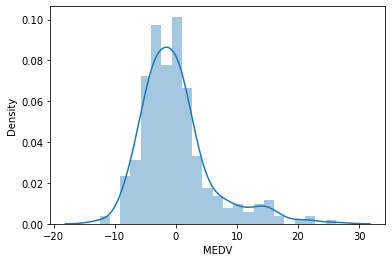

In [108]:
# Distribución de los residuos:
sns.distplot(Y_train_sin_RM - y_pred);

In [109]:
# Evaluando la regresión:

from sklearn import metrics

print('R-squared: ', metrics.r2_score(Y_train_sin_RM, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train_sin_RM, y_pred))*(len(Y_train_sin_RM)-1)/(len(Y_train_sin_RM)-X_train_sin_RM.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(Y_train_sin_RM, y_pred))
print('MSE: ',metrics.mean_squared_error(Y_train_sin_RM, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_train_sin_RM, y_pred)))

R-squared:  0.5740292875098046
Adjusted R^2: 0.571208289413843
MAE:  4.154335753541891
MSE:  33.91448738952187
RMSE:  5.823614632641987


# Validación del modelo test:

In [110]:
# Predicciones:
predictions = lm.predict(X_test_sin_RM)

Y_compare_linear = pd.DataFrame({'Actual': Y_test_sin_RM, 'Predicho': predictions})
Y_compare_linear.head() #mostrar la comparación entre los valores reales y predichos de MEDV

,Actual,Predicho
103,19.3,19.292366
60,18.7,20.914932
283,50.0,36.064388
147,14.6,13.421664
184,26.4,22.439226


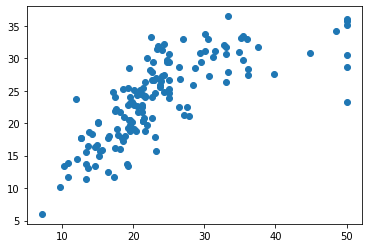

In [111]:
# diagrama de dispersión de y_test vs predicciones:
plt.scatter(Y_test_sin_RM, predictions);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


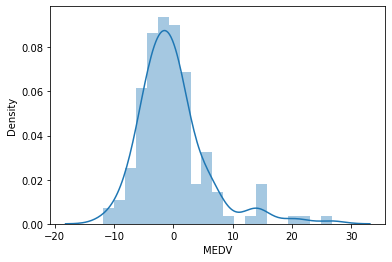

In [112]:
# Distribución de residuos.
sns.distplot(Y_test_sin_RM - predictions);

In [113]:
# Evaluación del modelo:
from sklearn import metrics

r2_linreg = metrics.r2_score(Y_test_sin_RM, predictions)
print('R-squared: ', r2_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test_sin_RM, predictions))*(len(Y_test)-1)/(len(Y_test_sin_RM)-X_test_sin_RM.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(Y_test_sin_RM, predictions))
print('MSE: ',metrics.mean_squared_error(Y_test_sin_RM, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test_sin_RM, predictions)))

R-squared:  0.5627099601500671
Adjusted R^2: 0.6661231452497134
MAE:  4.056219766556358
MSE:  33.57014628971365
RMSE:  5.793974999058388


In [114]:
MSE_lineal = 33.57014628971365
R2_lineal =  0.5627099601500671

# 2. Modelo de regresión Random Forest:

In [115]:
# Creando una instancia del regresor:
rf = RandomForestRegressor(n_estimators=100)

# Entrenando el modelo:
rf.fit(X_train_sin_RM, Y_train_sin_RM)


# Predicción sobre los datos del train:
y_pred = rf.predict(X_train_sin_RM)

Y_compare_randomforrest = pd.DataFrame({'Actual': Y_train_sin_RM, 'Predicho': y_pred})
Y_compare_randomforrest.head() #mostrando la comparación entre los valores reales y predichos de MEDV

,Actual,Predicho
89,28.7,29.483
313,21.6,22.054
93,25.0,25.381
307,28.2,26.542
287,23.2,23.768


# Evaluación del modelo

Para datos de entrenamiento:

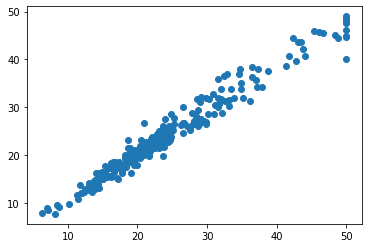

In [116]:
# Diagrama de dispersión de y_train vs y_pred:
plt.scatter(Y_train_sin_RM, y_pred)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


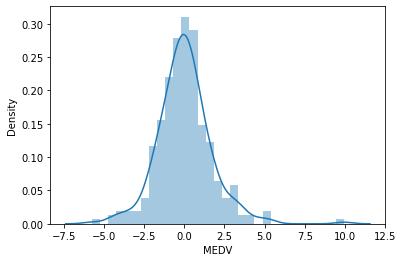

In [117]:
# Distribución de los residuos.
sns.distplot(Y_train_sin_RM - y_pred);

In [118]:
# Evaluación del modelo:
print('R^2:',metrics.r2_score(Y_train_sin_RM, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train_sin_RM, y_pred))*(len(Y_train_sin_RM)-1)/(len(Y_train_sin_RM)-X_train_sin_RM.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train_sin_RM, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train_sin_RM, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train_sin_RM, y_pred)))

R^2: 0.9637538209023547
Adjusted R^2: 0.9635137799811783
MAE: 1.2153767369242776
MSE: 2.885810098866215
RMSE: 1.698767229159491


# Para datos de validación Test:

In [119]:
pred = rf.predict(X_test_sin_RM)

# Evaluación del modelo:

r2_rf = metrics.r2_score(Y_test_sin_RM, pred)
print('R^2:', r2_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test_sin_RM, pred))*(len(Y_test_sin_RM)-1)/(len(Y_test_sin_RM)-X_test_sin_RM.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test_sin_RM, pred))
print('MSE:',metrics.mean_squared_error(Y_test_sin_RM, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test_sin_RM, pred)))

R^2: 0.6182807275507755
Adjusted R^2: 0.6131223590041643
MAE: 3.7195715862503937
MSE: 29.304056003930715
RMSE: 5.413322085737252


In [120]:
MSE_forest = 27.89262316206772
R2_forest = 0.6366662751839978

# 3. K-Nearest Neighbour regression model:

In [121]:
# Crear un regresor KNN.
knn = KNeighborsRegressor(n_neighbors=13)

# Entrena al modelo usando los conjuntos de train:
knn.fit(X_train_sin_RM, Y_train_sin_RM)

# Predicción de modelos en datos de train:
y_pred = knn.predict(X_train_sin_RM)

Y_compare_knn = pd.DataFrame({'Actual': Y_train_sin_RM, 'Predicho': y_pred})
Y_compare_knn.head() #mostrando la comparación entre los valores reales y predichos de MEDV

,Actual,Predicho
89,28.7,30.961538
313,21.6,21.561538
93,25.0,26.853846
307,28.2,22.315385
287,23.2,23.792308


#  Evaluación del modelo

Para datos de entrenamiento:

In [122]:
# Evalucación del modelo:

print('R^2:',metrics.r2_score(Y_train_sin_RM, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train_sin_RM, y_pred))*(len(Y_train_sin_RM)-1)/(len(Y_train_sin_RM)-X_train_sin_RM.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train_sin_RM, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train_sin_RM, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train_sin_RM, y_pred)))

R^2: 0.6511588068789502
Adjusted R^2: 0.6488486003019897
MAE: 3.5523076923076924
MSE: 27.77367057910563
RMSE: 5.270073109464956


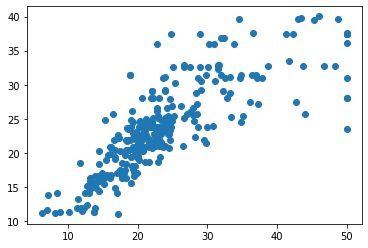

In [123]:
# diagrama de dispersión de y_train vs y_pred:
plt.scatter(Y_train_sin_RM, y_pred)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


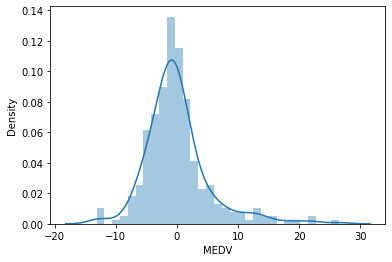

In [124]:
# Distribución de los residuos:
sns.distplot(Y_train_sin_RM - y_pred);

# Para datos de validación Test

In [126]:
# Predicción de datos de prueba con el modelo:
y_val_pred = knn.predict(X_test_sin_RM)

r2_svm = metrics.r2_score(Y_test_sin_RM, y_val_pred)
print('R^2:', r2_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test_sin_RM, y_val_pred))*(len(Y_test_sin_RM)-1)/(len(Y_test_sin_RM)-X_test_sin_RM.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test_sin_RM, y_val_pred))
print('MSE:',metrics.mean_squared_error(Y_test_sin_RM, y_val_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test_sin_RM, y_val_pred)))

R^2: 0.5509427962874445
Adjusted R^2: 0.5448744556967343
MAE: 4.154253693326542
MSE: 34.47349504290921
RMSE: 5.871413376939935


In [128]:
MSE_knn = 34.47349504290921
R2_knn = 0.5509427962874445

# Comparación de gráficos de valores reales y predichos de MEDV que obtuvimos usando diferentes modelos de aprendizaje automático:

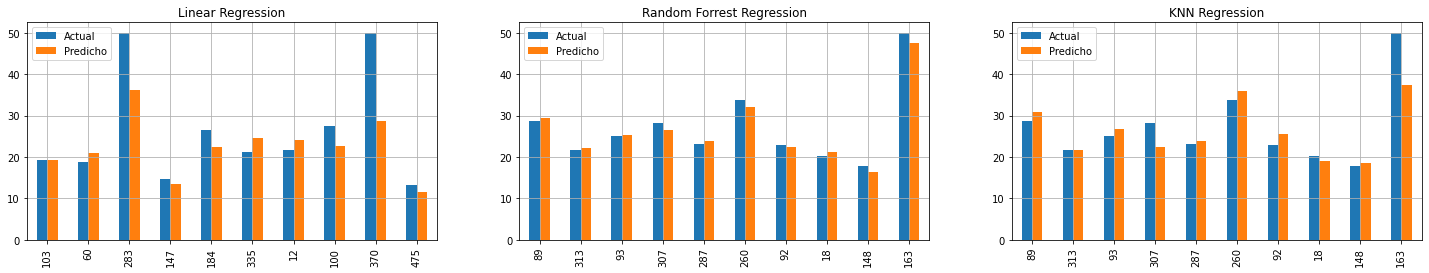

In [151]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[1])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[2])
plt.show()

# Evaluación y comparación de todos los modelos:

In [152]:
modelos_2 = pd.DataFrame({
    'Nombre Modelos': ['KNN', 'Linear Regression', 'Random Forest'], 'MSE': [MSE_knn, MSE_lineal, MSE_forest], 'R2': [R2_knn, R2_lineal, R2_forest],
    'R-squared Score': [r2_svm*100, r2_linreg*100, r2_rf*100 ]})
modelos_2

,Nombre Modelos,MSE,R2,R-squared Score
0,KNN,34.473495,0.550943,55.094280
1,Linear Regression,33.570146,0.562710,56.270996
2,Random Forest,27.892623,0.636666,61.828073


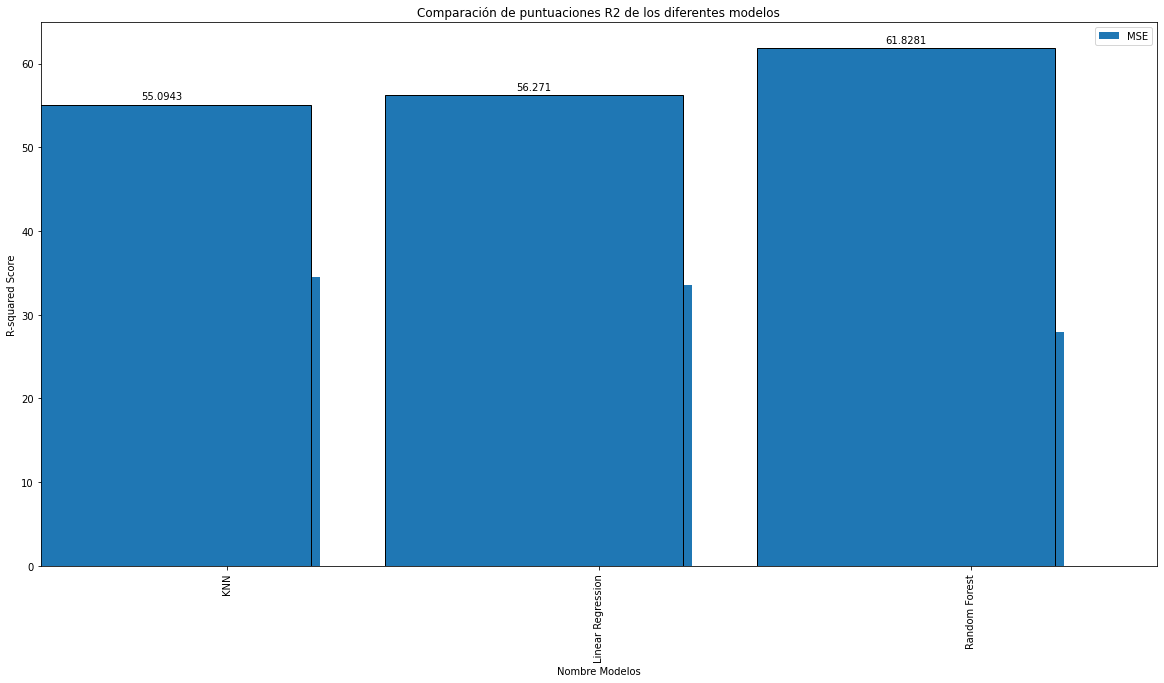

In [153]:
resultados_2= modelos_2['R-squared Score']
width = 0.35
x = np.arange(len(modelos_2))

modelos_2.plot(x=0, y=1, kind='bar', figsize=(20,10),
title='Comparación de puntuaciones R2 de los diferentes modelos'),
plt.ylabel('R-squared Score')

# Poner los resultados en cada barra:
ax = plt.subplot()
cifras_distritos = ax.bar(x -width/2, resultados_2, ec= 'black')
ax.bar_label(cifras_distritos, padding=3)

plt.show()